# IMPORTANCE OF DATA SIZE

In this jupyter notebook analysis we will investigate how important a dense data set is to kernel regression. We will investigate how the performance of kernel regression improves as the data size grows. We will fit several kernel regression models trained on different data sizes of a harmonic oscillator sequence.

**Append the directory of m_learn package to the system path**

In [1]:
from config import *
append_path('../../')

**Import necessary packages and modules**

In [2]:
import numpy as np
np.random.seed(0)
import pandas as pd
from m_learn.kernel_regression import kernel_regressor
from m_learn.utility.data_preprocessing import get_xy_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1. Generate a harmonic oscillator sequence

### 1.1 A function which generates harmonic oscillator sequence

In [3]:
def oscilator_data_generator(amplitude, zeta, w, phase, x):    
    '''
    A function which generates an damped harmonic oscillator sequence
    '''
    # input x
    x = np.array(x)
    # frequency * input
    wx = w*x
    # compute the damping term
    damping_term = amplitude*np.exp(-zeta*x)
    # compute the sinusoid argument
    argument = wx
    argument -= phase
    # compute the sinusoid term
    sinuisoid = np.sin(argument)
    # compute the osciallor sequence
    sequence = damping_term*sinuisoid
    # return the sequence data
    return sequence     

### 1.2 Generate an oscillatory sequence for the test set

**Oscillator parameters**

In [4]:
amplitude = 10
zeta = .3
w = 2*np.pi*1
phase = 0
x = np.linspace(0, 2*np.pi, 1000)

**Generate a sequence for the test set**

In [5]:
# generate the sequence
y = oscilator_data_generator(amplitude, zeta, w, phase, x)
# store the xy data in a pandas dataframe
test_data = pd.DataFrame({"x":x,"y":y})
print("shape of test data:",test_data.shape)

shape of test data: (1000, 2)


**Plot of the test data of the sequence**

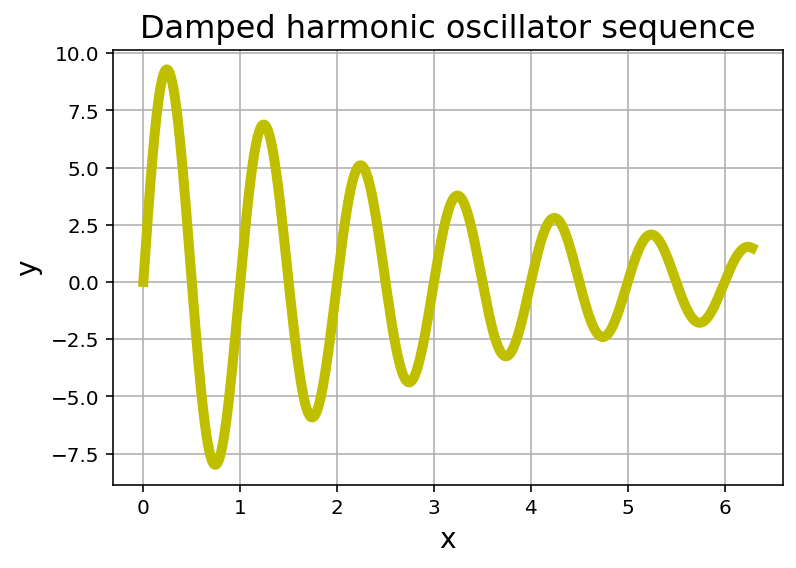

In [6]:
plt.plot(test_data.x, test_data.y, color = 'y', linewidth = 5)
plt.grid()
plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)
plt.title("Damped harmonic oscillator sequence", fontsize=16)
plt.show()

**Feature and output of the model**

In [7]:
features = ["x"]
output = "y"

**Extract the feature matrix and the output vector of the test set**

In [8]:
(x_test, y_test) = get_xy_data(test_data,features, output, False)

## 2. Investigate model performance as the amount of training data grows 

In this section we will investigate the performance of kernel regression models trained on different sizes of training data. We will investigate how the performance improves with an increase in size of the training data.

**Create a list of training data sizes**

In [9]:
# create a range of smaller data sizes
range_1 = np.linspace(10,50, 40).astype(int)
# create a range of larger data sizes
range_2 = np.linspace(50, 250, 50).astype(int)
# concatenate the two ranges
data_sizes = np.concatenate((range_1, range_2), axis =0).tolist()
print("List of training data sizes:",data_sizes)

List of training data sizes: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 50, 54, 58, 62, 66, 70, 74, 78, 82, 86, 90, 94, 98, 103, 107, 111, 115, 119, 123, 127, 131, 135, 139, 143, 147, 152, 156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 201, 205, 209, 213, 217, 221, 225, 229, 233, 237, 241, 245, 250]


### 2.1 A function which computes and stores the r-squared scores of kernel regression models trained on different sizes of training set

In [10]:
def data_performance_plot(model, data_sizes, test_data, features, output): 
    
    '''
    A function which computes and stores the r-squared scores of 
    models trained on different sizes of training sets
    Arguments:
    model - kernel regression model object
    data_sizes - list of data sizes of training set on which we will investigate performance 
    we will investigate performance of kernel regression model
    test_data - pandas dataframe containing the test data
    features - list of features of the model
    output - name of output of the model (string)
    '''
    
    # a list to store the r square scores of the models
    r2_scores = []

    # iterate through each data size
    for i, size in enumerate(data_sizes):
        # create a linearly spaced x data
        x = np.linspace(0, 2*np.pi, size)
        # generate the y sequence of a damped harmonic oscillation
        y = oscilator_data_generator(amplitude, zeta, w, phase, x)        
        # store the x & y data of the training set in a pandas dataframe
        train_data = pd.DataFrame({"x":x,"y":y})
        # extract the feature matrix and output vector of the training set
        (x_train, y_train) = get_xy_data(train_data,features, output, False)
        # fit the model using the training set
        model.fit(x_train, y_train)
        # compute predictions of the test set
        predictions = model.predict(test_data[features])        
        # compute the r-squared score on the test set
        score = r2_score(test_data[output], predictions)        
        # append the score to the designated list
        r2_scores.append(score)

    # return the list of r-squared scores of models trained on different sized training set
    return r2_scores

### 2.2 Investigate performance of kernel regressors with rbf kernel trained on different-sized training sets

In [11]:
# create the rbf model
model = kernel_regressor(kernel='rbf', gamma=230)
# extract the r-squared scores of the models
r2_scores = data_performance_plot(model, data_sizes, test_data, ["x"], "y")

#### Plot of r-squared score vs amount of data

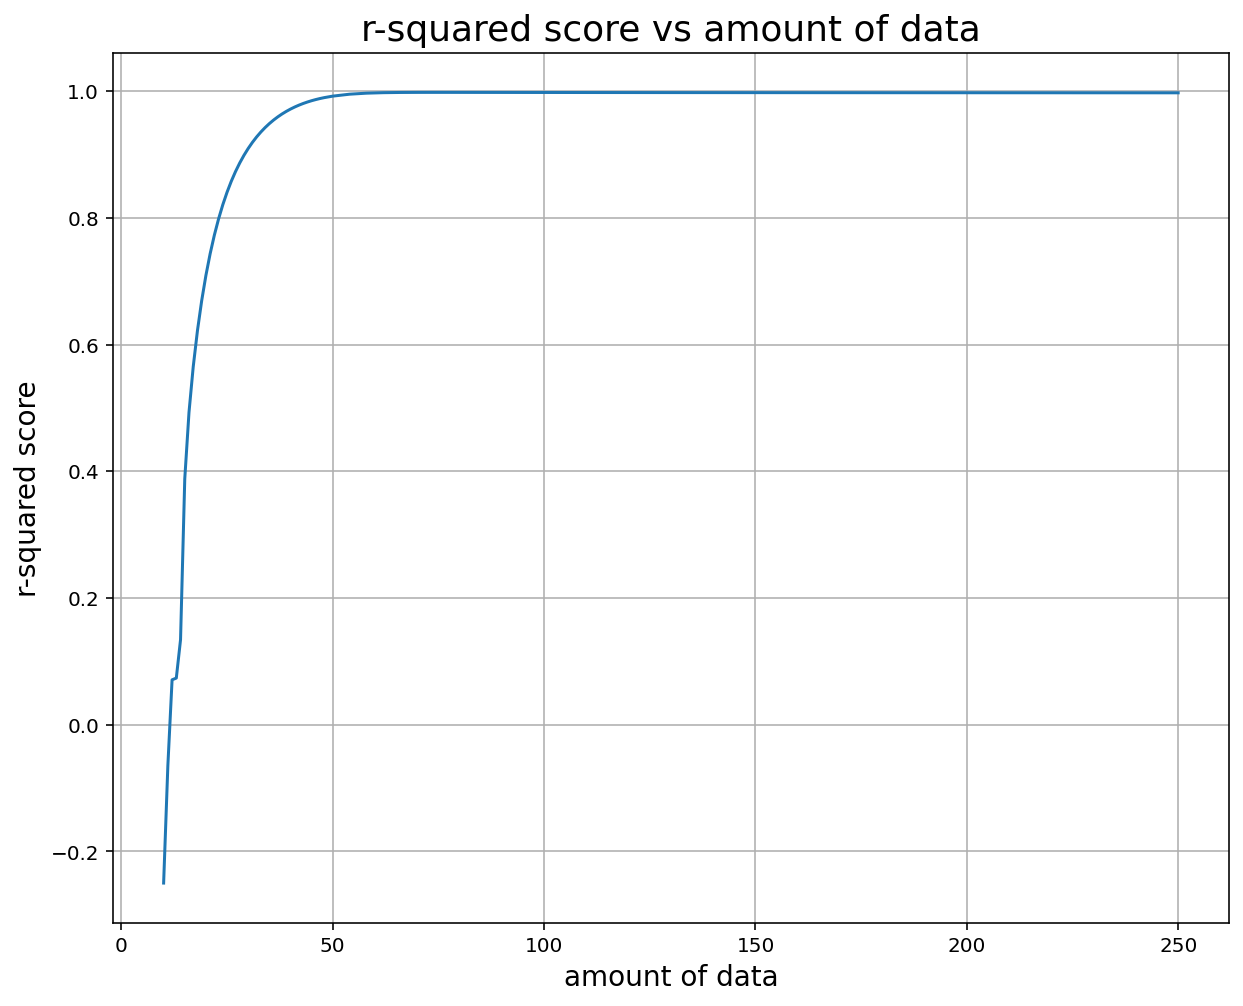

In [12]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(data_sizes,r2_scores)
plt.xlabel("amount of data", fontsize = 14)
plt.ylabel("r-squared score", fontsize = 14)
plt.title("r-squared score vs amount of data", fontsize = 18)
plt.grid()
plt.show()

### 2.3 Investigate performance of kernel regressors with Laplacian kernel trained on different-sized training sets

In [13]:
# create the laplacian model
model = kernel_regressor(kernel='laplacian', gamma=30)
# extract the r-squared scores of the models
r2_scores = data_performance_plot(model, data_sizes, test_data, ["x"], "y")

#### Plot of r-squared score vs amount of data

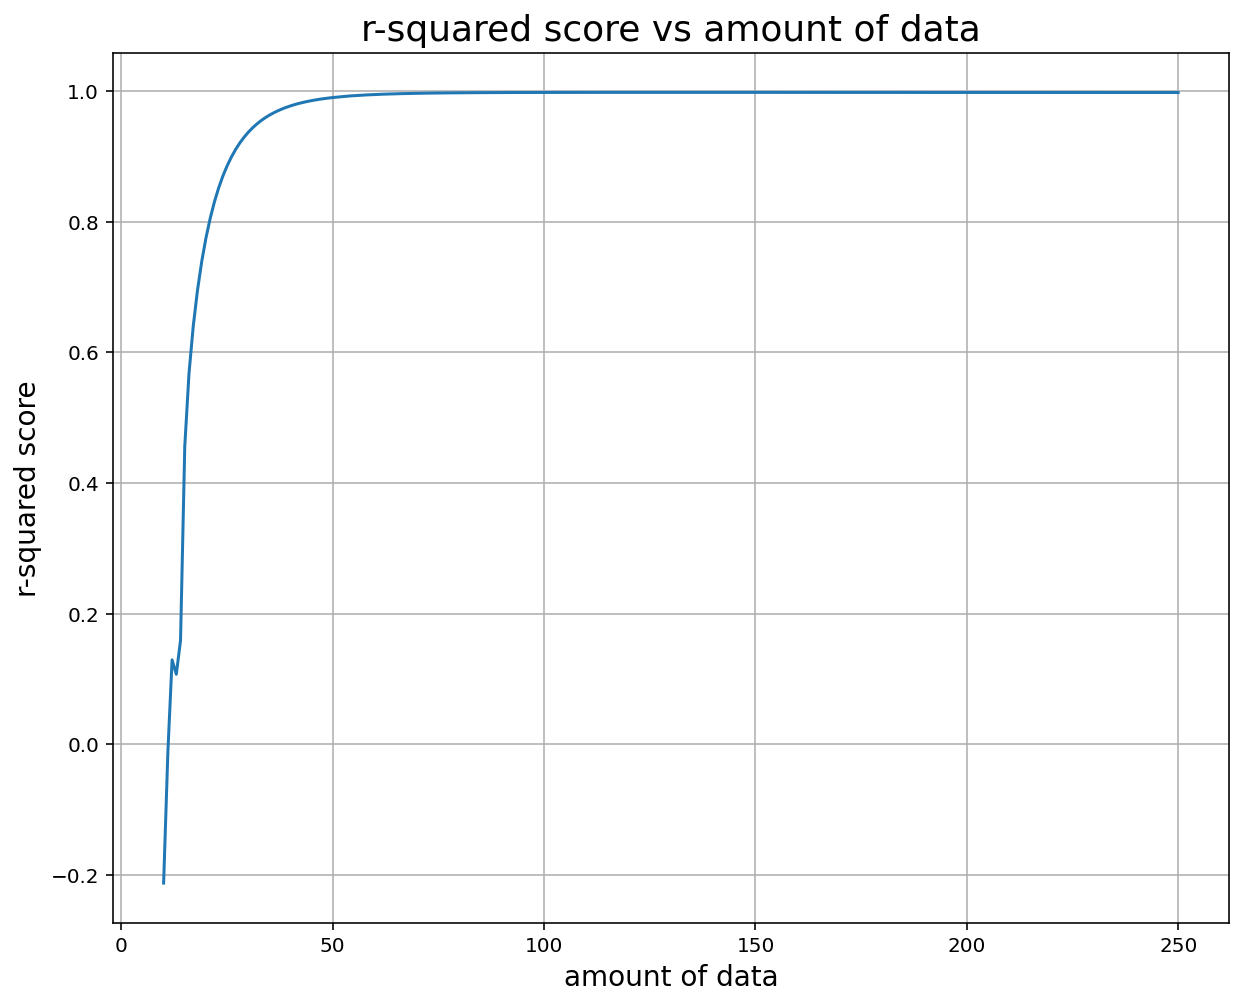

In [14]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(data_sizes,r2_scores)
plt.xlabel("amount of data", fontsize = 14)
plt.ylabel("r-squared score", fontsize = 14)
plt.title("r-squared score vs amount of data", fontsize = 18)
plt.grid()
plt.show()